## Unit 36 - Pandas DataFrame for Data Processing

## Keywords: DataFrame, Pandas I/O, Rows in DataFrame, Columns in DataFrame, DataReader API and Data Elements in DataFrame

## 2. Creating a DataFrame

#### 2.1. DataFrame creation basics

In [1]:
import pandas as pd
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
pd.DataFrame(data)

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


In [2]:
import pandas as pd

s = pd.Series([1.0, 2.0, 3.0], index = ["a", "b", "c"])
s2 = pd.Series([1.0, 2.0, 3.0, 4.0], index = ["a", "b", "c", "d"])

data = {"one": s, "two": s2}

pd.DataFrame(data)

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


#### 2.2. Set the name of the row (index) / column (columns) of the DataFrame

In [6]:
import pandas as pd
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data = d)
print(df)

df.index = ["new index0", "new index1"]
print(df)

df.columns = ["new_col1", "new_col2"]

print(df)

   col1  col2
0     1     3
1     2     4
            col1  col2
new index0     1     3
new index1     2     4
            new_col1  new_col2
new index0         1         3
new index1         2         4


In [4]:
df.rename(columns = {"col2": "new col2"})

,new_col1,new_col2
new index0,1,3
new index1,2,4


## 3. Converting various data object to DataFrame

#### 3.3. dataframe.head() for data review

In [7]:
import pandas as pd

df = pd.DataFrame({
    'animal': ['alligator', 'bee', 'falcon', 'lion', 'monkey', 'parrot', 'shark', 'whale', 'zebra']
})
df

,animal
0,alligator
1,bee
2,falcon
3,lion
4,monkey
5,parrot
6,shark
7,whale
8,zebra


In [11]:
df.head()

,animal
0,alligator
1,bee
2,falcon
3,lion
4,monkey


In [12]:
df.head(3)

,animal
0,alligator
1,bee
2,falcon


In [13]:
df.head(-3)

,animal
0,alligator
1,bee
2,falcon
3,lion
4,monkey
5,parrot


In [14]:
df.shape

(9, 1)

In [15]:
len(df)

9

In [16]:
df.columns

Index(['animal'], dtype='object')

In [17]:
df.values

array([['alligator'],
       ['bee'],
       ['falcon'],
       ['lion'],
       ['monkey'],
       ['parrot'],
       ['shark'],
       ['whale'],
       ['zebra']], dtype=object)

## 4. Converting a csv file to a DataFrame

#### 4.1. Reading a file and creating a DataFrame object

In [22]:
import pandas as pd
titanic = pd.read_csv("titanic.csv")

In [23]:
type(titanic)

pandas.core.frame.DataFrame

In [32]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
titanic = pd.read_csv("titanic.csv", skiprows = 2)

titanic.head(5)

,2,1,1.1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1.2,0,PC 17599,71.2833,C85,C
0,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
3,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
4,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [37]:
train = pd.read_csv('test.csv', skiprows = 2)

train.head(5)

,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,Unnamed: 9,S
0,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
1,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
2,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
3,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
4,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [48]:
train = pd.read_csv('test.csv', header = 2)

train.head(5)

,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,Unnamed: 9,S
0,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
1,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
2,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
3,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
4,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [54]:
train = pd.read_csv('test.csv', header = 0)
train.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
train = pd.read_csv('test.csv', header = None, names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k'])
train.head(2)

,a,b,c,d,e,f,g,h,i,j,k
0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [56]:
train = pd.read_csv('test.csv', index_col = 'Name')
train.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,
"Kelly, Mr. James",892,3,male,34.5,0,0,330911,7.8292,NaN,Q
"Wilkes, Mrs. James (Ellen Needs)",893,3,female,47.0,1,0,363272,7.0000,NaN,S


## 5. Converting Excel file to DataFrame

#### 5.1. Reading a file and creating a DataFrame object

In [65]:
import pandas as pd
df = pd.read_excel('all_seasons.xlsx', sheet_name = 1, header = 0)

df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Samsung,HOU,22,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


## 6. Converting JSON File to DataFrame

#### 6.4. Reading a file and creating a DataFrame a DataFrame object

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json('universities_ranking.json', orient = 'records')

df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,,18,85.21,2012


## 7. Reading data from remote data service using DataReader API

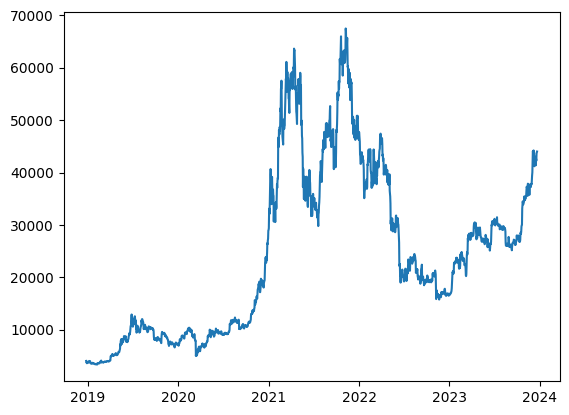

In [87]:
import pandas as pd
import pandas_datareader as pdr

# Bitcoin Stock from Fred
df = pdr.get_data_fred('CBBTCUSD')

plt.plot(df)

plt.show()

In [89]:
import pandas_datareader as pdr
from pandas_datareader import wb

all_indicators = pdr.wb.get_indicators()

all_indicators.iloc[:5, :2]

,id,name
0,1.0.HCount.1.90usd,Poverty Headcount ($1.90 a day)
1,1.0.HCount.2.5usd,Poverty Headcount ($2.50 a day)
2,1.0.HCount.Mid10to50,Middle Class ($10-50 a day) Headcount
3,1.0.HCount.Ofcl,Official Moderate Poverty Rate-National
4,1.0.HCount.Poor4uds,Poverty Headcount ($4 a day)


In [90]:
from pandas_datareader import wb

indicator_search = pdr.wb.search('life expectancy')

indicator_search.iloc[:5, :2]

,id,name
15863,SE.SCH.LIFE,"School life expectancy, primary to tertiary, b..."
15864,SE.SCH.LIFE.FE,"School life expectancy, primary to tertiary, f..."
15865,SE.SCH.LIFE.MA,"School life expectancy, primary to tertiary, m..."
17462,SP.DYN.LE00.FE.IN,"Life expectancy at birth, female (years)"
17463,SP.DYN.LE00.IN,"Life expectancy at birth, total (years)"


In [91]:
all_countries = pdr.wb.get_countries()

all_countries.loc[0:5, ['name', 'capitalCity', 'iso2c']]

,name,capitalCity,iso2c
0,Aruba,Oranjestad,AW
1,Africa Eastern and Southern,,ZH
2,Afghanistan,Kabul,AF
3,Africa,,A9
4,Africa Western and Central,,ZI
5,Angola,Luanda,AO


In [93]:
result_data = pdr.wb.download(indicator = "SP.DYN.LE00.IN", start = '1980', end = '1999')

result_data

SP.DYN.LE00.IN
country       year                
Canada        1999       78.839024
              1998       78.623659
              1997       78.412439
              1996       78.220244
              1995       77.977317
              1994       77.871707
              1993       77.704878
              1992       77.838049
              1991       77.593415
              1990       77.436585
              1989       77.124878
              1988       76.858780
              1987       76.778780
              1986       76.463902
              1985       76.327317
              1984       76.331951
              1983       76.060488
              1982       75.725122
              1981       75.497805
              1980       75.102195
Mexico        1999       73.225000
              1998       72.845000
              1997       72.445000
              1996       72.037000
              1995       71.646000
              1994       71.279000
              1993       70.942000
              1992       70.616000
              1991       70.298000
              1990       69.971000
              1989       69.623000
              1988       69.253000
              1987       68.844000
              1986       68.388000
              1985       67.874000
              1984       67.290000
              1983       66.644000
              1982       65.975000
              1981       65.313000
              1980       64.703000
United States 1999       76.582927
              1998       76.580488
              1997       76.429268
              1996       76.026829
              1995       75.621951
              1994       75.619512
              1993       75.419512
              1992       75.617073
              1991       75.365854
              1990       75.214634
              1989       75.017073
              1988       74.765854
              1987       74.765854
              1986       74.614634
              1985       74.563415
              1984       74.563415
              1983       74.463415
              1982       74.360976
              1981       74.009756
              1980       73.609756

In [96]:
result_data = pdr.wb.download(indicator = "SP.DYN.LE00.IN", start = '1980', end = '1999', country = 'all')

result_data

SP.DYN.LE00.IN
country                     year                
Africa Eastern and Southern 1999       51.237852
                            1998       50.325913
                            1997       50.974231
                            1996       50.810689
                            1995       51.001925
...                                          ...
Zimbabwe                    1984       61.051000
                            1983       60.248000
                            1982       59.875000
                            1981       59.327000
                            1980       58.674000

[5320 rows x 1 columns]

In [103]:
from pandas_datareader import wb

result_data = pdr.wb.download(indicator = "SP.DYN.LE00.IN", start = '1975', end = '1999', country = 'all')

pivot_result = result_data.reset_index().pivot(index = 'country', columns = 'year')

pivot_result

SP.DYN.LE00.IN                                   \
year                                  1975       1976       1977       1978   
country                                                                       
Afghanistan                      40.100000  40.645000  41.228000  40.271000   
Africa Eastern and Southern      47.759887  48.349588  48.635905  48.763605   
Africa Western and Central       44.201254  45.003163  45.719889  46.269535   
Albania                          68.328000  68.704000  69.121000  69.309000   
Algeria                          46.972000  47.985000  49.191000  50.353000   
...                                    ...        ...        ...        ...   
West Bank and Gaza                     NaN        NaN        NaN        NaN   
World                            60.166100  60.625810  61.120867  61.481455   
Yemen, Rep.                      45.245000  46.238000  47.286000  48.392000   
Zambia                           54.239000  54.604000  54.709000  54.610000   
Zimbabwe                         57.552000  56.936000  56.285000  54.593000   

                                                                         \
year                              1979       1980       1981       1982   
country                                                                   
Afghanistan                  39.086000  39.618000  40.164000  37.766000   
Africa Eastern and Southern  49.261336  49.636538  50.057073  50.296849   
Africa Western and Central   46.673736  47.015239  47.297190  47.529378   
Albania                      69.584000  70.478000  70.730000  71.023000   
Algeria                      51.755000  53.261000  55.276000  57.428000   
...                                ...        ...        ...        ...   
West Bank and Gaza                 NaN        NaN        NaN        NaN   
World                        61.902752  62.233556  62.611283  62.972214   
Yemen, Rep.                  49.394000  50.654000  51.709000  52.405000   
Zambia                       54.439000  54.143000  54.047000  53.859000   
Zimbabwe                     55.038000  58.674000  59.327000  59.875000   

                                                   ...                        \
year                              1983       1984  ...       1990       1991   
country                                            ...                         
Afghanistan                  38.187000  33.329000  ...  45.967000  46.663000   
Africa Eastern and Southern  48.703331  48.652665  ...  50.607728  50.390460   
Africa Western and Central   47.785262  47.931920  ...  48.650003  48.662461   
Albania                      71.296000  71.502000  ...  73.144000  73.378000   
Algeria                      59.510000  61.658000  ...  67.416000  67.688000   
...                                ...        ...  ...        ...        ...   
West Bank and Gaza                 NaN        NaN  ...  67.934000  68.306000   
World                        63.215641  63.520124  ...  65.188407  65.335190   
Yemen, Rep.                  53.923000  54.934000  ...  58.699000  59.049000   
Zambia                       53.389000  52.755000  ...  47.926000  47.097000   
Zimbabwe                     60.248000  61.051000  ...  59.426000  58.091000   

                                                                         \
year                              1992       1993       1994       1995   
country                                                                   
Afghanistan                  47.596000  51.466000  51.495000  52.544000   
Africa Eastern and Southern  49.962114  50.273628  50.882582  51.001925   
Africa Western and Central   48.737266  48.832039  48.681892  48.783773   
Albania                      73.715000  73.939000  74.131000  74.362000   
Algeria                      67.757000  67.719000  67.361000  67.454000   
...                                ...        ...        ...        ...   
West Bank and Gaza           68.592000  68.853000  69.413000  69.662000   

In [104]:
result_country = pivot_result.idxmin(axis = 0, skipna = True)
print(result_country)

                year
SP.DYN.LE00.IN  1975        Cambodia
                1976        Cambodia
                1977     Timor-Leste
                1978     Timor-Leste
                1979     Timor-Leste
                1980     Timor-Leste
                1981     Timor-Leste
                1982     Timor-Leste
                1983     Timor-Leste
                1984     South Sudan
                1985     South Sudan
                1986     South Sudan
                1987     South Sudan
                1988     South Sudan
                1989     South Sudan
                1990     South Sudan
                1991         Somalia
                1992     South Sudan
                1993     South Sudan
                1994          Rwanda
                1995     South Sudan
                1996     South Sudan
                1997     South Sudan
                1998     South Sudan
                1999    Sierra Leone
dtype: object


## 8. Manipulating Rows, Columns, and Elements in a DataFrame

In [111]:
import pandas as pd

rank = pd.read_json('universities_ranking.json', orient = 'records')

rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2200 non-null   object 
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 240.8+ KB


In [106]:
rank.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,,18,85.21,2012


#### 8.1. drop() to delete row, column

In [109]:
rank.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], axis = 0, inplace = False)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
11,12,Cornell University,USA,10,21,42,14,22,21,16,,10,73.69,2012
12,13,University of Pennsylvania,USA,11,31,16,24,9,10,8,,9,73.64,2012
13,14,University of Tokyo,Japan,1,32,19,31,8,19,23,,3,69.49,2012
14,15,Johns Hopkins University,USA,12,34,77,20,11,9,9,,7,66.94,2012
15,16,Swiss Federal Institute of Technology in Zurich,Switzerland,1,26,66,11,40,51,44,,34,66.69,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981,871,44.03,2015
2197,998,Federal University of CearÃ¡,Brazil,18,367,549,218,830,823,812,975,824,44.03,2015
2198,999,University of A CoruÃ±a,Spain,40,367,567,218,886,974,812,975,651,44.02,2015


In [113]:
rank.drop(["national_rank", "alumni_employment"], axis = 1, inplace = False)

,world_rank,institution,country,quality_of_education,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,7,1,1,1,1,,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,9,3,12,4,4,,1,91.67,2012
2,3,Stanford University,USA,17,5,4,2,2,,15,89.50,2012
3,4,University of Cambridge,United Kingdom,10,4,16,16,11,,50,86.17,2012
4,5,California Institute of Technology,USA,2,7,37,22,22,,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,367,218,926,845,812,969,816,44.03,2015
2196,997,Alexandria University,Egypt,236,218,997,908,645,981,871,44.03,2015
2197,998,Federal University of CearÃ¡,Brazil,367,218,830,823,812,975,824,44.03,2015
2198,999,University of A CoruÃ±a,Spain,367,218,886,974,812,975,651,44.02,2015


#### 8.2. Select row

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

rank = pd.read_json('universities_ranking.json', orient = 'records')

index_position = rank.iloc[1:10]
index_position

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,,16,78.55,2012
